<a href="https://colab.research.google.com/github/ZTatman/Artificial-Intelligence/blob/master/HW_4/HW_4_problem_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3 Problem Part A

# Download Cat and Dog Data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-21 21:02:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   117MB/s    in 0.6s    

2020-04-21 21:02:58 (117 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Build network with Xception conv_base and custom classifier

In [4]:
from keras.applications import Xception

conv_base = Xception(weights='imagenet',
                     include_top=False,
                     input_shape=(150, 150, 3))
conv_base.summary()

Using TensorFlow backend.


83689472/83683744 [==============================] - 2s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
__________________________

# Freeze the Pretrained Base

In [0]:
conv_base.trainable = False

# Add Custom Classifier to Pretrained Base

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
# conv_base
model.add(conv_base)
# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='softmax'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

# Augment Dataset, Compile and Train Model

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=64
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 34s 337ms/step - loss: 0.6752 - acc: 0.7430 - val_loss: 0.6201 - val_acc: 0.9520
Epoch 2/50
100/100 [==============================] - 24s 236ms/step - loss: 0.6566 - acc: 0.8150 - val_loss: 0.6124 - val_acc: 0.9290
Epoch 3/50
100/100 [==============================] - 24s 238ms/step - loss: 0.6505 - acc: 0.8180 - val_loss: 0.6266 - val_acc: 0.9510
Epoch 4/50
100/100 [==============================] - 24s 237ms/step - loss: 0.6469 - acc: 0.8370 - val_loss: 0.6091 - val_acc: 0.9620
Epoch 5/50
100/100 [==============================] - 24s 238ms/step - loss: 0.6449 - acc: 0.8365 - val_loss: 0.6184 - val_acc: 0.9640
Epoch 6/50
100/100 [==============================] - 24s 237ms/step - loss: 0.6441 - acc: 0.8415 - val_loss: 0.6112 - val_acc: 0.9580
Epoch 7/50
100/100 [==============================] - 24s 239ms/step - loss: 0.6415 - acc: 0.8395 - val_lo

# Plot Loss and Accuracy

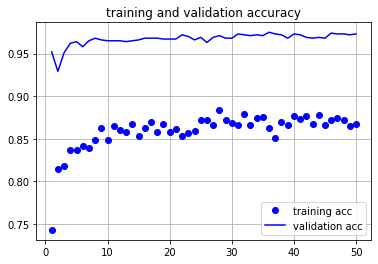

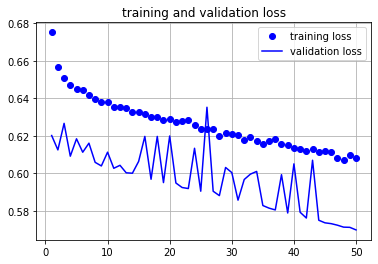

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.grid()
plt.figure()

# training and validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.grid()
plt.show()

# Unfreeze last few layers in conv_base

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# Retrain Model after Finetuning

In [10]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=64)

Epoch 1/50
100/100 [==============================] - 28s 278ms/step - loss: 0.6042 - acc: 0.8895 - val_loss: 0.5884 - val_acc: 0.9460
Epoch 2/50
100/100 [==============================] - 24s 237ms/step - loss: 0.6038 - acc: 0.8880 - val_loss: 0.5954 - val_acc: 0.9380
Epoch 3/50
100/100 [==============================] - 24s 236ms/step - loss: 0.6081 - acc: 0.8615 - val_loss: 0.5785 - val_acc: 0.9340
Epoch 4/50
100/100 [==============================] - 23s 234ms/step - loss: 0.6020 - acc: 0.8910 - val_loss: 0.5699 - val_acc: 0.9300
Epoch 5/50
100/100 [==============================] - 22s 224ms/step - loss: 0.6047 - acc: 0.8865 - val_loss: 0.6043 - val_acc: 0.9360
Epoch 6/50
100/100 [==============================] - 22s 221ms/step - loss: 0.6030 - acc: 0.8830 - val_loss: 0.5986 - val_acc: 0.9320
Epoch 7/50
100/100 [==============================] - 22s 224ms/step - loss: 0.6009 - acc: 0.8935 - val_loss: 0.5747 - val_acc: 0.9300
Epoch 8/50
100/100 [==============================] - 2

# Plot Loss and Accuracy after Finetuning

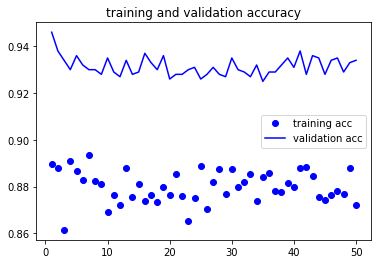

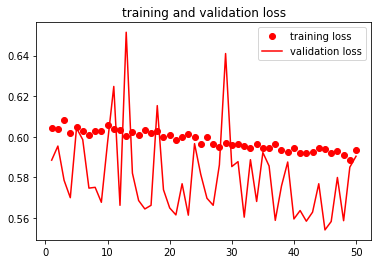

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'ro', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# Print Accuracy and Loss

In [12]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.5986533164978027
Validation accuracy: 0.9352791905403137


# Save Pretrained Model

In [0]:
model_fname = 'cats_and_dogs_small_4.h5' 
model.save(model_fname)

In [15]:
from google.colab import files


with open(model_fname, 'r') as f:
  files.download(model_fname)

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 53336, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil